## Intelligent Data Analysis Project
### Exam: Income groups (Project 1)
### Keerthan Shetty (810177)

### Problem setting

A polling institute wants to be able to estimate an individual’s income from his/her personal data. To this aim, 30,000 individuals were interviewed . For some of the individuals, not all features are available. Crucially, the income of only 5,000 of the interviewee’s is known.

### Task

To predict the income group of the remaining 25.000 interviewees and to prepare the data such that they can be used for further regression and correlation analyses.

In [2]:
#import the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from collections import Counter
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn import metrics



import warnings
warnings.filterwarnings("ignore")

In [3]:
# "?" is considered as missing value
missing_values=["?",np.nan]
missing_values

['?', nan]

In [4]:
#column names
column=['Age','Employment_type','Weighting_factor','Level_of_education','Schooling/training_period','Marital_status',\
        'Employment_area','Partnership','Ethnicity','Gender','Gains_on_financial_assets','Losses_on_financial_assets',\
        'Weekly working time','Country_of_birth','Income']

#Reading data from csv file with skipinitialspace=True and "?" as na_values.
data=pd.read_csv('einkommen.train',
                 names=column,
                 skipinitialspace=True,
                 na_values=missing_values)

In [5]:
data.head()

,Age,Employment_type,Weighting_factor,Level_of_education,Schooling/training_period,Marital_status,Employment_area,Partnership,Ethnicity,Gender,Gains_on_financial_assets,Losses_on_financial_assets,Weekly working time,Country_of_birth,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         30000 non-null  int64 
 1   Employment_type             28323 non-null  object
 2   Weighting_factor            30000 non-null  int64 
 3   Level_of_education          30000 non-null  object
 4   Schooling/training_period   30000 non-null  int64 
 5   Marital_status              30000 non-null  object
 6   Employment_area             28318 non-null  object
 7   Partnership                 30000 non-null  object
 8   Ethnicity                   30000 non-null  object
 9   Gender                      30000 non-null  object
 10  Gains_on_financial_assets   30000 non-null  int64 
 11  Losses_on_financial_assets  30000 non-null  int64 
 12  Weekly working time         30000 non-null  int64 
 13  Country_of_birth            29461 non-null  ob

In [7]:
data.describe()

,Age,Weighting_factor,Schooling/training_period,Gains_on_financial_assets,Losses_on_financial_assets,Weekly working time
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,38.582467,1.897675e+05,10.079733,1091.686667,86.621200,40.431933
std,13.647747,1.054420e+05,2.572236,7467.388819,401.529212,12.313094
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784780e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369385e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


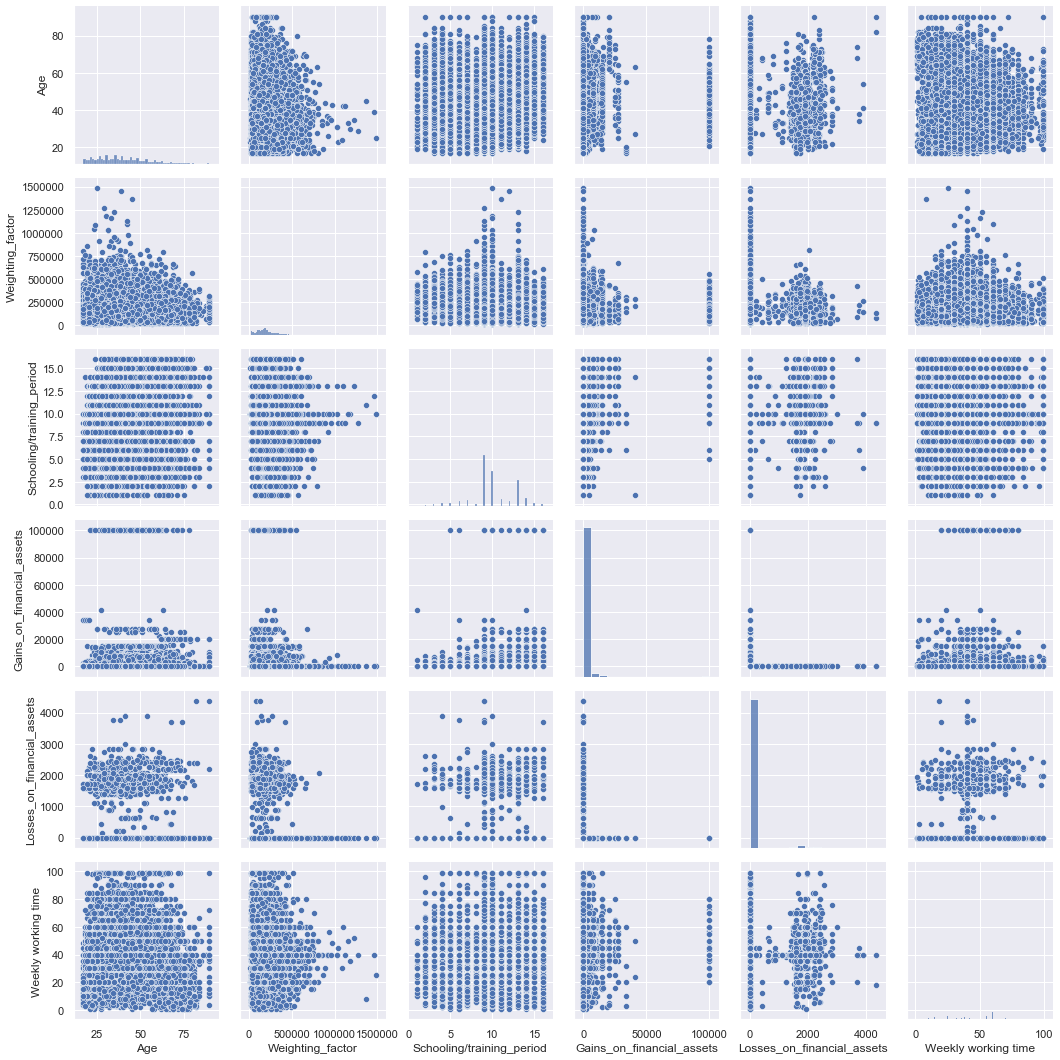

In [7]:
#checking if there are any corellation in the data
sns.pairplot(data)

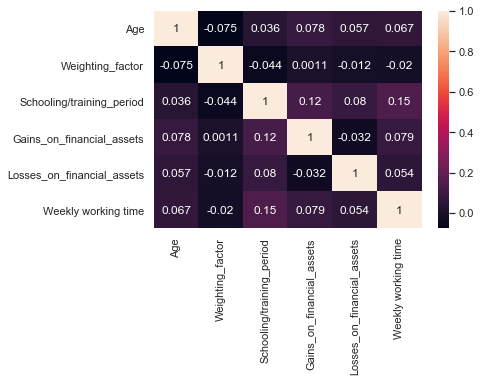

In [8]:
sns.heatmap(data.corr(),annot=True);

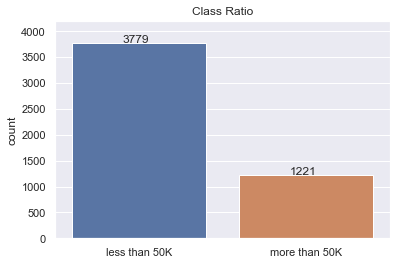

In [8]:
output = ["less than 50K" if i=='<=50K' else "more than 50K" if i == '>50K' else np.nan for i in data['Income'][:5000]]
ax=sns.countplot(x=output);
ax.set_title("Class Ratio");
for p in ax.patches:#to get description of each count plot x,y position, height
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()))#To display the text  at *xy*
ax.set_ylim([0,4200])
plt.show()

In [9]:
counter = Counter(output)
for key,value in counter.items():
    percentage = value / len(output) * 100
    print('Class=%s, Count=%d, Percentage=%.2f%%' % (key, value, percentage))

Class=less than 50K, Count=3779, Percentage=75.58%
Class=more than 50K, Count=1221, Percentage=24.42%


In [10]:
#Finding missing value count
data.isnull().sum()

Age                               0
Employment_type                1677
Weighting_factor                  0
Level_of_education                0
Schooling/training_period         0
Marital_status                    0
Employment_area                1682
Partnership                       0
Ethnicity                         0
Gender                            0
Gains_on_financial_assets         0
Losses_on_financial_assets        0
Weekly working time               0
Country_of_birth                539
Income                        25000
dtype: int64

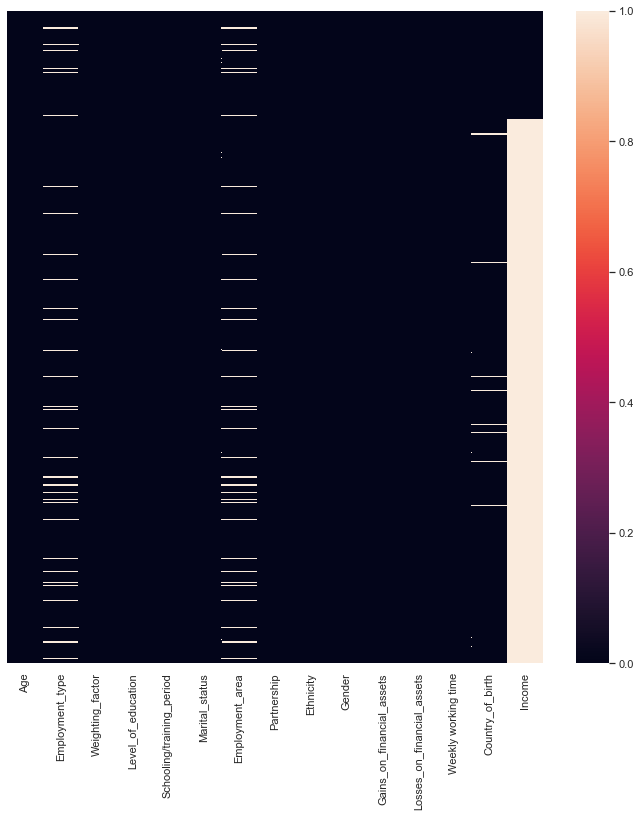

In [11]:
#distribution of null values
plt.subplots(figsize = (12,12))
sns.heatmap(data.isnull(),yticklabels=False)

In [12]:
#percentage of Null values in the entire data
for column in data.columns:
    if data[column].isnull().sum() > 0:
        print(f'{column} has {data[column].isnull().sum() / len(data[column])  * 100:.2f}%.')
       

Employment_type has 5.59%.
Employment_area has 5.61%.
Country_of_birth has 1.80%.
Income has 83.33%.


In [13]:
#percentage of NULL values in training data
training = data[:5000]
for column in training.columns:
    if training[column].isnull().sum() > 0:
        print(f'{column} has {training[column].isnull().sum() / len(training[column])  * 100:.2f}%.')

to_predict= data[5000:]

Employment_type has 6.62%.
Employment_area has 6.62%.
Country_of_birth has 1.94%.


In [14]:
data['Employment_type'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [15]:
data['Employment_area'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [16]:
data['Country_of_birth'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [17]:
#records with both 'Employment_type' and 'Employment_area' as NULL
data[data['Employment_type'].isnull() & data['Employment_area'].isnull()].count()['Age']

1677

In [18]:
#records with  'Employment_type' notnull and 'Employment_area' as NULL
data[data['Employment_type'].notnull() & data['Employment_area'].isnull()]

,Age,Employment_type,Weighting_factor,Level_of_education,Schooling/training_period,Marital_status,Employment_area,Partnership,Ethnicity,Gender,Gains_on_financial_assets,Losses_on_financial_assets,Weekly working time,Country_of_birth,Income
5361,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,NaN
10845,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,NaN
14772,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,NaN
20337,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,NaN
23232,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,NaN


In [19]:
#finding duplicate records - could be different people with same details
data[data.duplicated()].shape[0]

18

In [20]:
len(data['Level_of_education'].unique())

16

In [21]:
len(data['Schooling/training_period'].unique())

16

In [22]:
#find unique combination of Schooling/training_period and Level_of_education
data[['Schooling/training_period','Level_of_education']].\
drop_duplicates(ignore_index=True).sort_values(by='Schooling/training_period',ignore_index=True)


,Schooling/training_period,Level_of_education
0,1,Preschool
1,2,1st-4th
2,3,5th-6th
3,4,7th-8th
4,5,9th
5,6,10th
6,7,11th
7,8,12th
8,9,HS-grad
9,10,Some-college


In [23]:
categorical=['Employment_type','Schooling/training_period','Marital_status',\
        'Employment_area','Partnership','Ethnicity','Gender','Country_of_birth']

In [24]:
def percentage(a,n,l):
    fig, ax = plt.subplots(1,l,figsize = (12,5))
    fig.tight_layout(h_pad=2)
    for i in range(a,n):
        counts = (data[:5000].groupby(['Income'])[categorical[i]] # groupby Income and get the required column
                  .value_counts(normalize=True) #calculate the percentage for each category of a column for both income category
                  .rename('ptg') # rename the column of the dateframe 
                  .reset_index())

        p=sns.barplot(ax =ax[i-a], x=categorical[i], y="ptg", hue="Income", data=counts)
        q = plt.setp(p.get_xticklabels(), rotation=90)

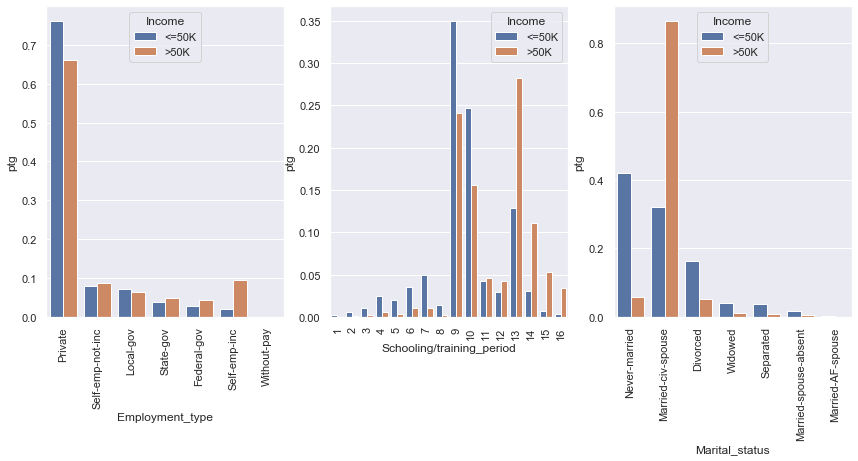

In [26]:
percentage(0,3,3)

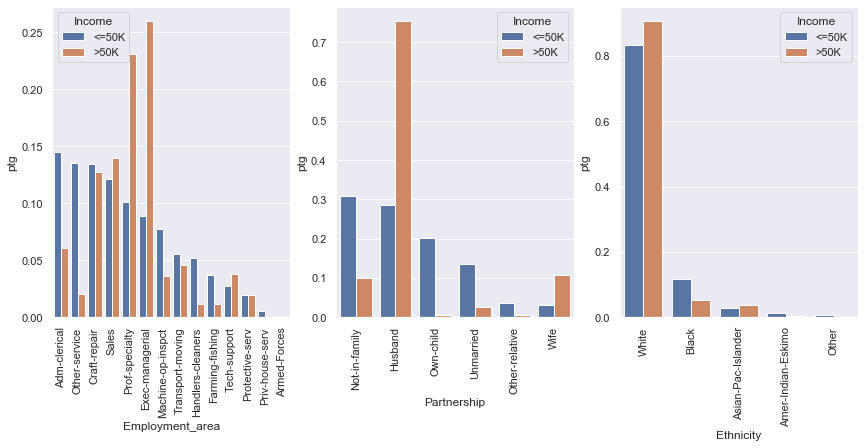

In [27]:
percentage(3,6,3)

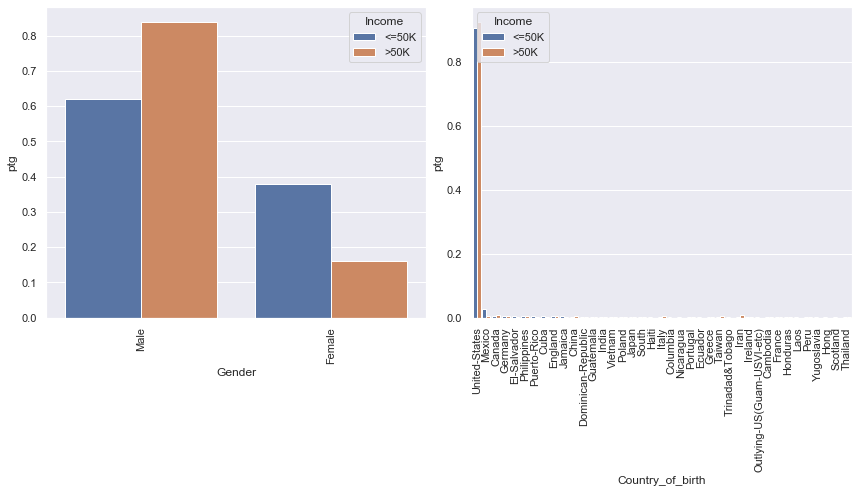

In [28]:
percentage(6,8,2)

In [25]:
def percentage_all(a,n,l,t):
    fig, ax = plt.subplots(1,l, figsize = (16,5))
    for i in range(a,n):
        sns.countplot(x=data[categorical[i]],ax=ax[i-a])
        for tick in ax[i-a].get_xticklabels():
            tick.set_rotation(t)

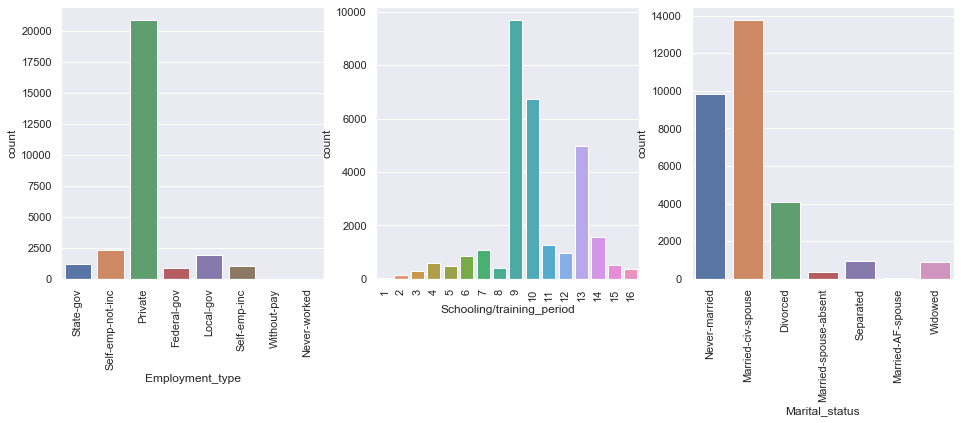

In [30]:
percentage_all(0,3,3,90)

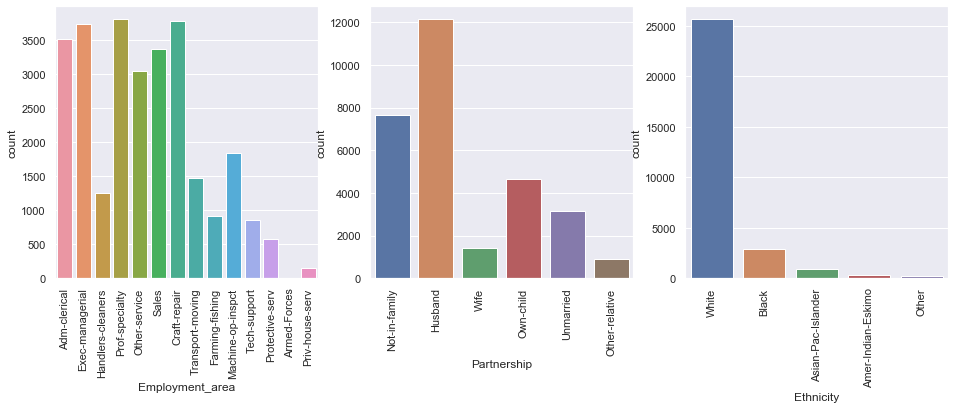

In [31]:
percentage_all(3,6,3,90)

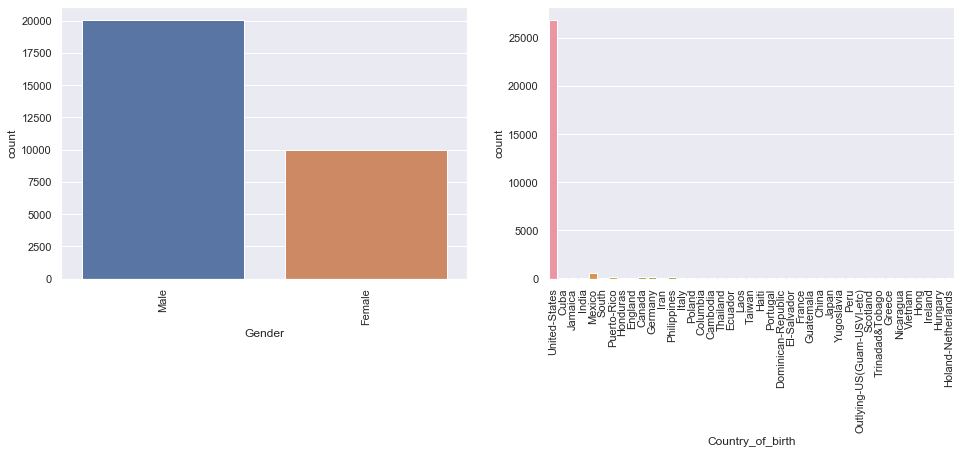

In [32]:
percentage_all(6,8,2,90)

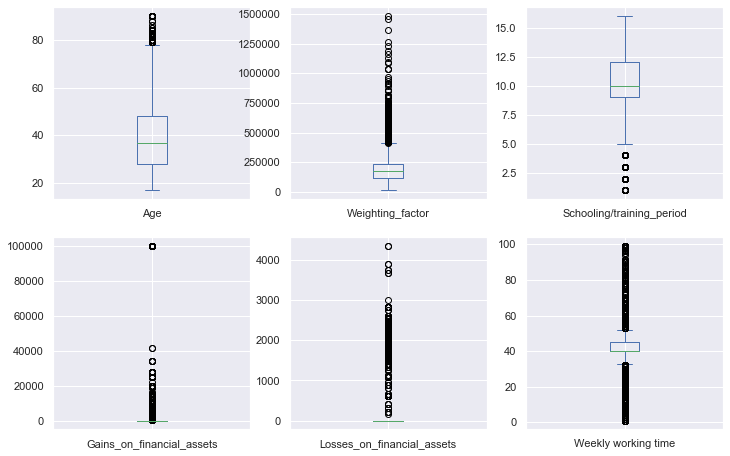

In [26]:
data.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True);

### check value range for numeric columns

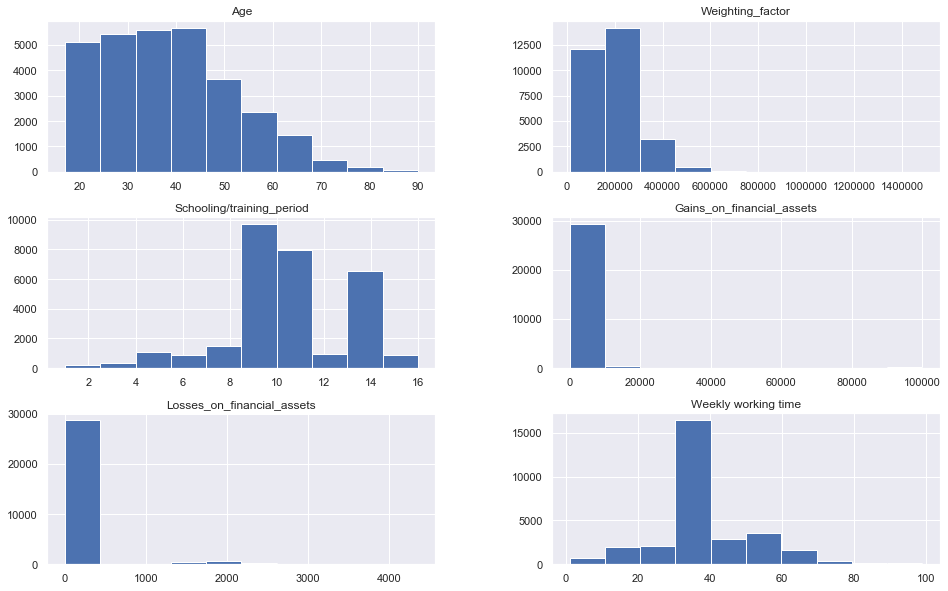

In [27]:
num_values = data.select_dtypes(include=['int64']).columns
num_data = data[num_values]
num_data.hist(figsize=(16,10));


In [28]:
#drop Level_of_education column
data.drop(columns=['Level_of_education'],inplace=True)

### Replacing Null values

In [29]:
# replce null value with most frequent value
nulls = ['Employment_type', 'Employment_area','Country_of_birth']

data[nulls]=data[nulls].fillna(data.mode().iloc[0])

### Normalizing the numeric data

In [30]:
#All features end up having the same scale, it does not handle outliers well.-min_max
def normalise(data):
    for c in data.columns:
        if data[c].dtypes=='int64':
            data[c]=z_score.fit_transform(data[[c]])

In [31]:
z_score=StandardScaler() #the choice of ddof is unlikely to affect model performance.
normalise(data)

### One Hot encoding

In [32]:
data_Final=pd.get_dummies(data.drop('Income', axis=1))

In [33]:
training=data[:5000]
data_y=np.where(training['Income']=='<=50K',0,1)

In [34]:
data_X=data_Final[:5000]

### train test split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(data_X,data_y,test_size=.25,random_state=0,stratify=data_y)

### Training Models

### Random forest

In [36]:
rfc = RandomForestClassifier(n_estimators=50)

model_rfc = rfc.fit(X_train, y_train)
prediction_rfc = model_rfc.predict(X_test)

print(f'Training data accuracy: {rfc.score(X_train, y_train):.2f}')
print(f'Testing data accuracy: {rfc.score(X_test, y_test):.2f}')

Training data accuracy: 1.00
Testing data accuracy: 0.84


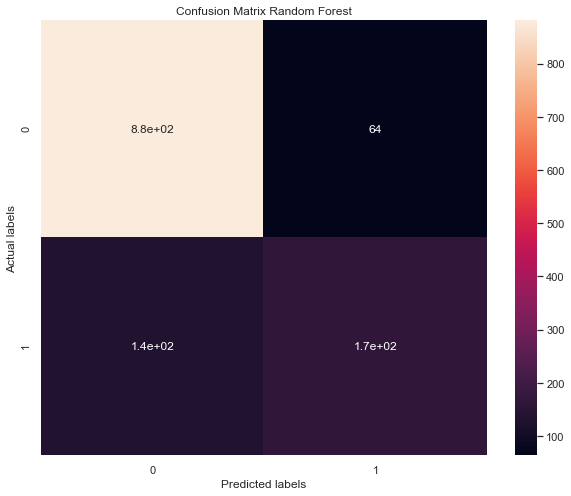

In [37]:
cm = confusion_matrix(y_test, prediction_rfc)
plt.figure(figsize=(10,8))
ax= plt.gca()
sns.heatmap(cm, annot=True); #annot=write value on cell

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix Random Forest'); 

In [38]:
print(classification_report(y_test, prediction_rfc))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       945
           1       0.72      0.55      0.63       305

    accuracy                           0.84      1250
   macro avg       0.79      0.74      0.76      1250
weighted avg       0.83      0.84      0.83      1250



### SVM

In [39]:
clfs = []
#the gamma parameter defines how far the influence of a single training example reaches.
# C parameter trades off correct classification of training examples against maximization of the decision function’s margin
for c in 10 ** np.arange(-3, 3).astype(float):
    clf_svm = SVC(C=c,kernel='linear')
    clf_svm.fit(X_train, y_train)
    clf_svm.name = f'c={c}'
    clfs.append(clf_svm)

In [40]:
def plot_roc_curves(fprs, tprs):    
    fig = plt.figure(figsize=(12,10))
    
    for fpr, tpr in zip(fprs, tprs):
        plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f )'  % (metrics.auc(fpr, tpr)))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

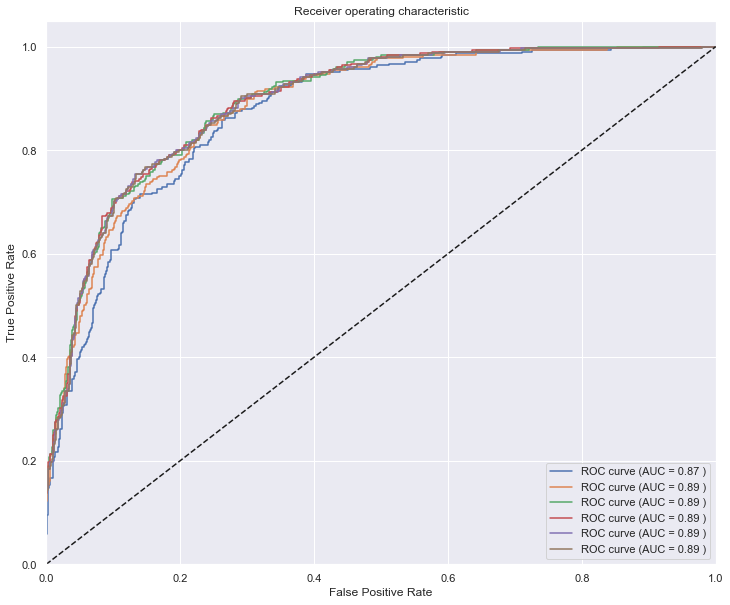

In [41]:
fprs, tprs = [], []
name=[]
for i,clf in enumerate(clfs):
    y_score = clf.decision_function(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_score, pos_label=1)
    fprs.append(fpr)
    tprs.append(tpr)
    
    
plot_roc_curves(fprs, tprs )

In [96]:
svm=SVC(kernel='linear',C=.1)
model_svm=svm.fit(X_train,y_train)
prediction_svm = model_svm.predict(X_test)

print(f'Training data accuracy: {svm.score(X_train, y_train):.2f}')
print(f'Testing data accuracy: {svm.score(X_test, y_test):.2f}')

Training data accuracy: 0.86
Testing data accuracy: 0.86


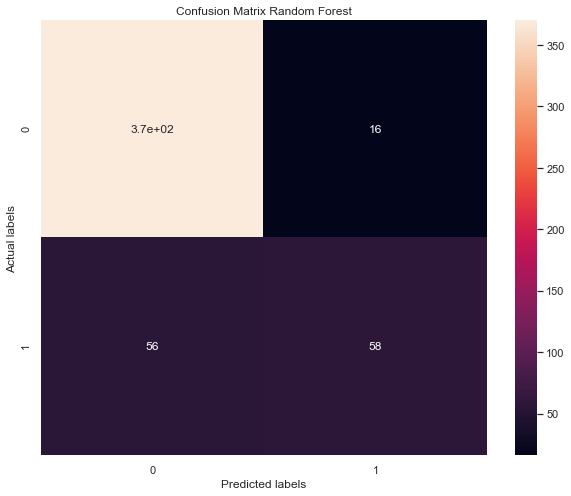

In [97]:
cm = confusion_matrix(y_test, prediction_svm)
plt.figure(figsize=(10,8))
ax= plt.gca()
sns.heatmap(cm, annot=True); #annot=write value on cell

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix Random Forest'); 

In [98]:
print(classification_report(y_test, prediction_svm))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       386
           1       0.78      0.51      0.62       114

    accuracy                           0.86       500
   macro avg       0.83      0.73      0.76       500
weighted avg       0.85      0.86      0.84       500



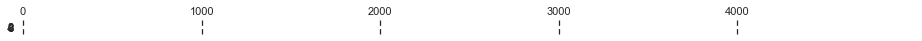

In [84]:
import math
#function to create k-fold train-test-splits
def create_kfold_mask(num_samples, k):
    masks = []
    fold_size = math.floor(num_samples / k)
    
    for i in range(k):
        mask = np.zeros(num_samples, dtype=bool)
        #print(mask)
        mask[i*fold_size:(i+1)*fold_size] = True
        #print(mask)
        masks.append(mask)
        
    return masks

# visualization of the splits created by 'create_kfold_mask'
masks = create_kfold_mask(5000, 10)
plt.matshow(masks)

In [87]:
m=[]
for i in range(len(masks)):
   m.append(masks[i].astype(int)*5) 
len(m[0])

5000

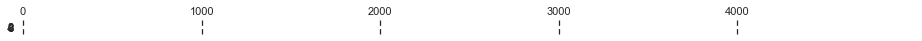

In [88]:
plt.matshow(m)

In [89]:
#data_X,data_y
X_shuffled=data_X.sample(frac=1,random_state=0)
y_shuffled=pd.DataFrame(data_y).sample(frac=1,random_state=0)

In [90]:
cs = [0.01, 0.1, 1.0, 10.0, 100.0]
scores_outer = []
cs_selected = []
for mo in masks:
    X_test, y_test = X_shuffled[mo], y_shuffled[mo]
    X_rest, y_rest = X_shuffled[np.invert(mo)], y_shuffled[np.invert(mo)]   
    scores_means = []
    for c in cs:
        scores_inner = []
        for mi in create_kfold_mask(len(X_rest), 3):
            X_eval, y_eval = X_rest[mi], y_rest[mi]
            X_train, y_train = X_rest[np.invert(mi)], y_rest[np.invert(mi)]  
            clf_svm = SVC(gamma=10, C=c, probability=True)
            clf_svm.fit(X_train, y_train)
            y_pred = clf_svm.predict(X_eval)
            cur_score = metrics.accuracy_score(y_eval, y_pred)
            scores_inner.append(cur_score)
        #print(scores_inner)
        c_score = np.mean(scores_inner)
        #print(c_score,c)
        scores_means.append(c_score)
    best_c = cs[np.argmax(scores_means)]
    #print(best_c)
    cs_selected.append(best_c)
    clf_svm = SVC(gamma=10, C=best_c, probability=True)
    clf_svm.fit(X_rest, y_rest)
    y_pred = clf_svm.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    scores_outer.append(score)

In [91]:
cs_selected

[100.0, 100.0, 10.0, 100.0, 1.0, 0.01, 1.0, 10.0, 10.0, 1.0]

In [92]:
scores_outer

[0.752, 0.754, 0.766, 0.766, 0.79, 0.734, 0.738, 0.76, 0.738, 0.764]

In [93]:
cs = [0.01, 0.1, 1.0, 10.0, 100.0]
scores_outer = []
cs_selected = []
for mo in masks:
    X_test, y_test = X_shuffled[mo], y_shuffled[mo]
    X_rest, y_rest = X_shuffled[np.invert(mo)], y_shuffled[np.invert(mo)]   
    scores_means = []
    for c in cs:
        scores_inner = []
        for mi in create_kfold_mask(len(X_rest), 3):
            X_eval, y_eval = X_rest[mi], y_rest[mi]
            X_train, y_train = X_rest[np.invert(mi)], y_rest[np.invert(mi)]  
            clf_svm = SVC(kernel='linear', C=c, probability=True)
            clf_svm.fit(X_train, y_train)
            y_pred = clf_svm.predict(X_eval)
            cur_score = metrics.accuracy_score(y_eval, y_pred)
            scores_inner.append(cur_score)
        #print(scores_inner)
        c_score = np.mean(scores_inner)
        #print(c_score,c)
        scores_means.append(c_score)
    best_c = cs[np.argmax(scores_means)]
    #print(best_c)
    cs_selected.append(best_c)
    clf_svm = SVC(gamma=10, C=best_c, probability=True)
    clf_svm.fit(X_rest, y_rest)
    y_pred = clf_svm.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    scores_outer.append(score)

In [94]:
print(f'cs_selected {cs_selected}\nscores_outer {scores_outer}')

cs_selected [100.0, 1.0, 0.1, 0.1, 0.1, 0.1, 0.1, 100.0, 1.0, 0.1]
scores_outer [0.752, 0.76, 0.764, 0.784, 0.788, 0.734, 0.726, 0.76, 0.734, 0.772]


In [108]:
Counter(cs_selected ).most_common(1)[0][0]

0.1

In [112]:
sum(scores_outer)/len(scores_outer)

0.7574

### Logistic Regression

In [52]:
lr = LogisticRegression()#l2 norm

model_lr = lr.fit(X_train, y_train)
prediction_lr = model_lr.predict(X_test)

print(f'Training data accuracy: {lr.score(X_train, y_train):.2f}')
print(f'Testing data accuracy: {lr.score(X_test, y_test):.2f}')

Training data accuracy: 0.85
Testing data accuracy: 0.85


In [53]:
print(model_lr.coef_)

[[ 0.32616302 -0.01865811  0.72471723  1.78105385  0.25307233  0.47675444
   0.51516538 -0.44123412  0.         -0.02759015  0.40817376 -0.40072525
  -0.06320228  0.         -0.31060273 -0.19490761  1.64167012 -0.27905807
  -0.51075003 -0.09844887 -0.25731546 -0.16278484 -0.10407351  0.11844498
   0.79131108 -1.27140793 -0.3138449  -0.18125264 -0.3406348  -0.18189752
   0.29561927  0.28506817  0.23818134  0.83074997 -0.01289131  0.02265414
   0.05282584 -0.57969326 -1.20014765  0.21463014  1.48031815 -0.23263477
   0.23606382  0.32522729 -0.88707453  0.54900553 -0.38208564  0.37267298
   0.98055512  0.25902756 -0.58223429 -0.99724994 -0.38975779 -0.20242962
  -0.11554211 -0.62494519 -0.13308087  0.1568571  -0.1768435  -0.19544708
   0.04450646 -0.33120579  0.         -0.12116169 -0.01037115  0.
   0.07483542  0.95688908  0.46937739  1.22725159  0.91642588  0.08038927
  -0.28322135 -0.40643501 -0.33036394 -0.10159346 -0.38924812  0.22699995
   0.10123583  0.73360521 -0.52083582  0.     

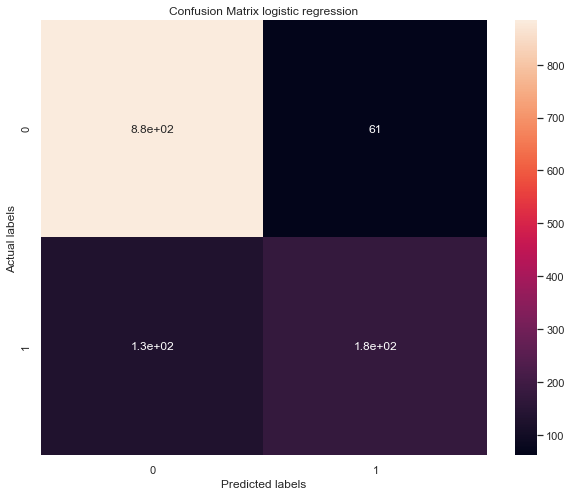

In [54]:
cm = confusion_matrix(y_test, prediction_lr)
plt.figure(figsize=(10,8))
ax= plt.gca()
sns.heatmap(cm, annot=True); #annot=write value on cell

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix logistic regression'); 

In [55]:
print(classification_report(y_test, prediction_lr))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       945
           1       0.74      0.57      0.65       305

    accuracy                           0.85      1250
   macro avg       0.81      0.75      0.77      1250
weighted avg       0.84      0.85      0.84      1250



### ROC curve

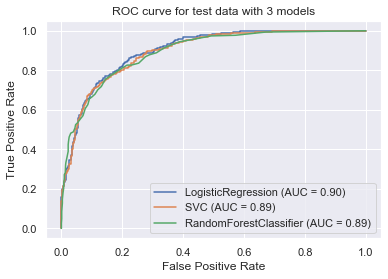

In [56]:
model=[model_lr,model_svm,model_rfc]
ax = plt.gca() #to get the current Axes instance on the current figure
for i in model:
    metrics.plot_roc_curve(i, X_test, y_test, ax=ax)
ax.set_title('ROC curve for test data with 3 models'); 

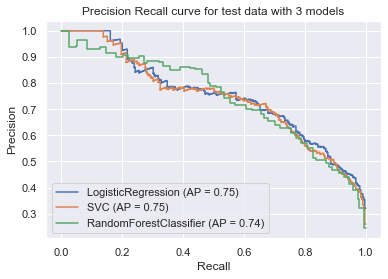

In [57]:
ax = plt.gca() #to get the current Axes instance on the current figure
for i in model:
    disp = plot_precision_recall_curve(i, X_test, y_test,ax=ax)
ax.set_title('Precision Recall curve for test data with 3 models'); 

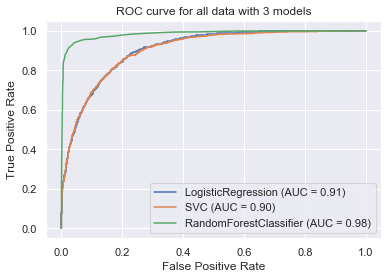

In [58]:
ax = plt.gca() #to get the current Axes instance on the current figure
for i in model:
    metrics.plot_roc_curve(i, data_X, data_y, ax=ax)
ax.set_title('ROC curve for all data with 3 models'); 

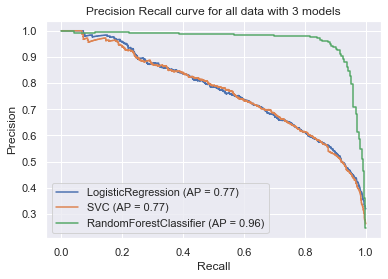

In [59]:
ax = plt.gca() #to get the current Axes instance on the current figure
for i in model:
    disp = plot_precision_recall_curve(i, data_X, data_y,ax=ax)
plt.title('Precision Recall curve');
ax.set_title('Precision Recall curve for all data with 3 models'); 

In [60]:
model_rfc = rfc.fit(data_X,data_y)
model_svm = svm.fit(data_X,data_y)
model_lr = lr.fit(data_X,data_y)

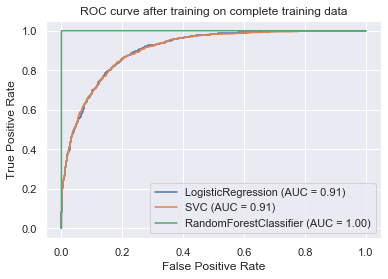

In [61]:

ax = plt.gca() #to get the current Axes instance on the current figure
for i in model:
    metrics.plot_roc_curve(i, data_X, data_y, ax=ax)
ax.set_title('ROC curve after training on complete training data'); 

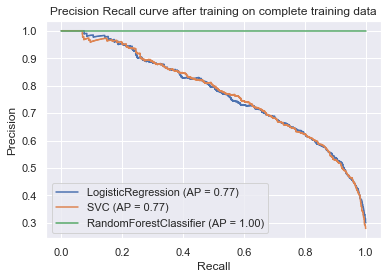

In [62]:
ax = plt.gca() #to get the current Axes instance on the current figure
for i in model:
    disp = plot_precision_recall_curve(i, data_X, data_y,ax=ax)
plt.title('Precision Recall curve');
ax.set_title('Precision Recall curve after training on complete training data'); 

### Prediction

In [63]:
Counter(model_rfc.predict(data_Final[5000:]))

Counter({1: 4911, 0: 20089})

In [64]:
Counter(model_lr.predict(data_Final[5000:]))

Counter({1: 4963, 0: 20037})

In [65]:
Counter(model_svm.predict(data_Final[5000:]))

Counter({1: 4881, 0: 20119})

In [66]:
for i,c in enumerate(data_Final):
    for j,c1 in enumerate(data_Final):
        if i>j and (data_Final[c].corr(data_Final[c1] )>.5 or data_Final[c].corr(data_Final[c1]) <-.5):
            print(f' {c} and {c1} -> {data_Final[c].corr(data_Final[c1]):.2f}')

 Employment_type_Self-emp-not-inc and Employment_type_Private -> -0.51
 Marital_status_Never-married and Age -> -0.53
 Marital_status_Never-married and Marital_status_Married-civ-spouse -> -0.64
 Partnership_Husband and Marital_status_Married-civ-spouse -> 0.89
 Partnership_Husband and Marital_status_Never-married -> -0.58
 Partnership_Not-in-family and Marital_status_Married-civ-spouse -> -0.54
 Partnership_Own-child and Marital_status_Never-married -> 0.51
 Ethnicity_White and Ethnicity_Black -> -0.79
 Gender_Female and Partnership_Husband -> -0.58
 Gender_Male and Partnership_Husband -> 0.58
 Gender_Male and Gender_Female -> -1.00
